# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Sendhy Maula Ammarulloh
- Email: A595YBM451@devacademy.id
- Id Dicoding: A595YBM451

## Persiapan

Tahapan persiapan data diawali dengan mengimpor library utama seperti `pandas`, `numpy`, `matplotlib`, dan `seaborn`, lalu membaca dataset dari URL dan menyimpannya ke dalam sebuah DataFrame.

### Menyiapkan library yang dibutuhkan

In [1]:
# Impor library utama
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Menyiapkan data yang akan diguankan

In [2]:
# Baca data dari URL dan simpan sebagai DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv", sep=";")
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

Tahapan **Data Understanding** dimulai dengan pemeriksaan nilai yang hilang dan tipe data untuk memastikan kelengkapan serta jenis masing-masing kolom. Statistik deskriptif digunakan untuk melihat distribusi dan ringkasan nilai dari fitur numerik maupun kategorikal. Visualisasi distribusi status mahasiswa memberikan gambaran awal mengenai keseimbangan kelas target. Selanjutnya, data disalin dan fitur-fitur kategorikal diubah ke dalam label yang lebih mudah dimengerti agar analisis lebih intuitif. Beberapa kolom juga diubah secara eksplisit menjadi tipe kategorikal untuk mendukung proses eksplorasi lanjutan. Distribusi fitur kategorikal dan numerik terhadap status mahasiswa divisualisasikan guna mengidentifikasi pola-pola hubungan awal yang mungkin signifikan. Terakhir, analisis korelasi antar fitur numerik dilakukan untuk mendeteksi keterkaitan antar variabel yang berpotensi memengaruhi performa model prediktif di tahap selanjutnya.

In [3]:
# Cek apakah ada data yang hilang
df.isnull().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


In [4]:
# Cek tipe data setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [5]:
# Statistik deskriptif untuk kolom numerik
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [6]:
# Statistik deskriptif untuk kolom kategorikal
df.describe(include="object")

,Status
count,4424
unique,3
top,Graduate
freq,2209


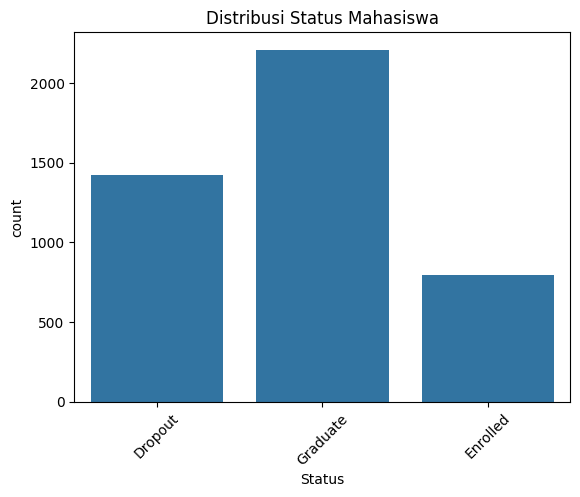

In [7]:
# Lihat distribusi kelas target
sns.countplot(data=df, x='Status')
plt.title('Distribusi Status Mahasiswa')
plt.xticks(rotation=45)
plt.show()

In [8]:
# Salin data untuk proses transformasi
df_copy = df.copy()

# Ubah nilai numerik menjadi label kategori yang mudah dimengerti
df_copy['Marital_status'] = df_copy['Marital_status'].map({1: 'Single', 2: 'Married', 3: 'Widower', 4: 'Divorced', 5: 'Facto Union', 6: 'Legally Separated'})
df_copy['Daytime_evening_attendance'] = df_copy['Daytime_evening_attendance'].map({1: 'Daytime', 0: 'Evening'})
df_copy['Gender'] = df_copy['Gender'].map({1: 'Male', 0: 'Female'})
df_copy['Displaced'] = df_copy['Displaced'].map({1: 'Yes', 0: 'No'})
df_copy['Debtor'] = df_copy['Debtor'].map({1: 'Yes', 0: 'No'})
df_copy['Tuition_fees_up_to_date'] = df_copy['Tuition_fees_up_to_date'].map({1: 'Yes', 0: 'No'})
df_copy['Scholarship_holder'] = df_copy['Scholarship_holder'].map({1: 'Yes', 0: 'No'})
df_copy['International'] = df_copy['International'].map({1: 'Yes', 0: 'No'})

# Jadikan beberapa kolom sebagai kategori
categorical_features = ['Marital_status', 'Daytime_evening_attendance', 'Gender', 'Displaced','Debtor', 'Tuition_fees_up_to_date', 'Scholarship_holder', 'International']
df_copy[categorical_features] = df_copy[categorical_features].astype('category')

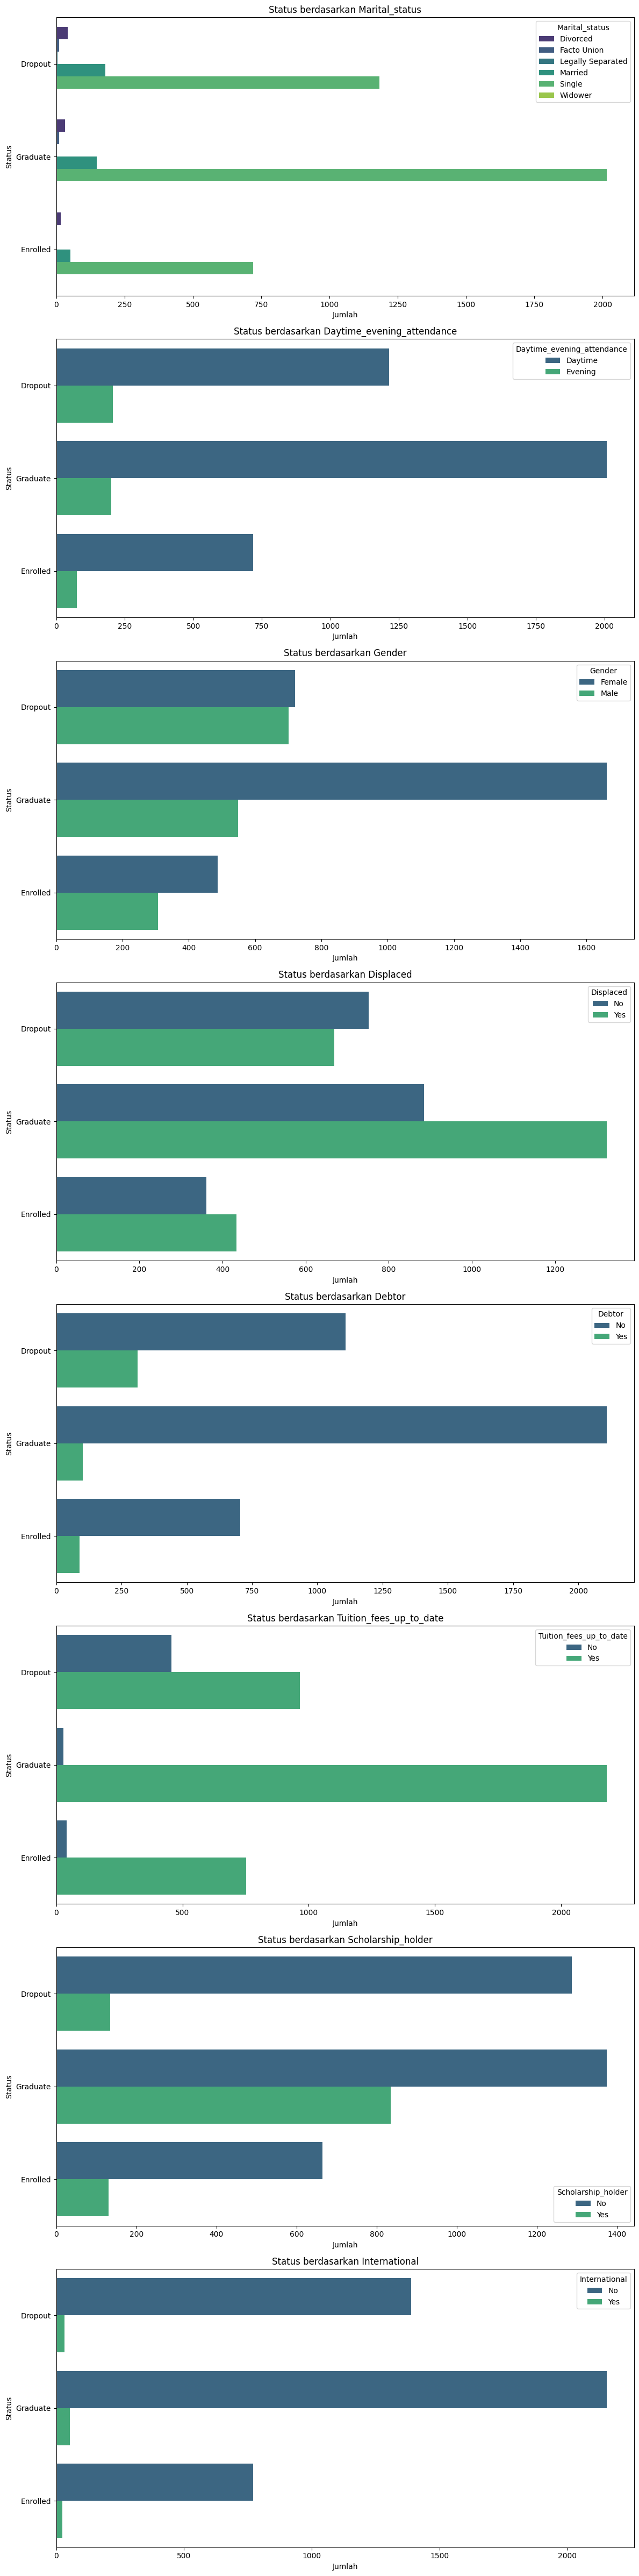

In [9]:
# Plot distribusi status mahasiswa berdasarkan fitur kategori
fig, ax = plt.subplots(len(categorical_features), 1, figsize=(12, 6 * len(categorical_features)))
for i, feature in enumerate(categorical_features):
    sns.countplot(data=df_copy, y='Status', hue=feature, ax=ax[i], palette='viridis')
    ax[i].set_title(f'Status berdasarkan {feature}')
    ax[i].set_xlabel('Jumlah')
    ax[i].set_ylabel('Status')
plt.tight_layout()
plt.show()

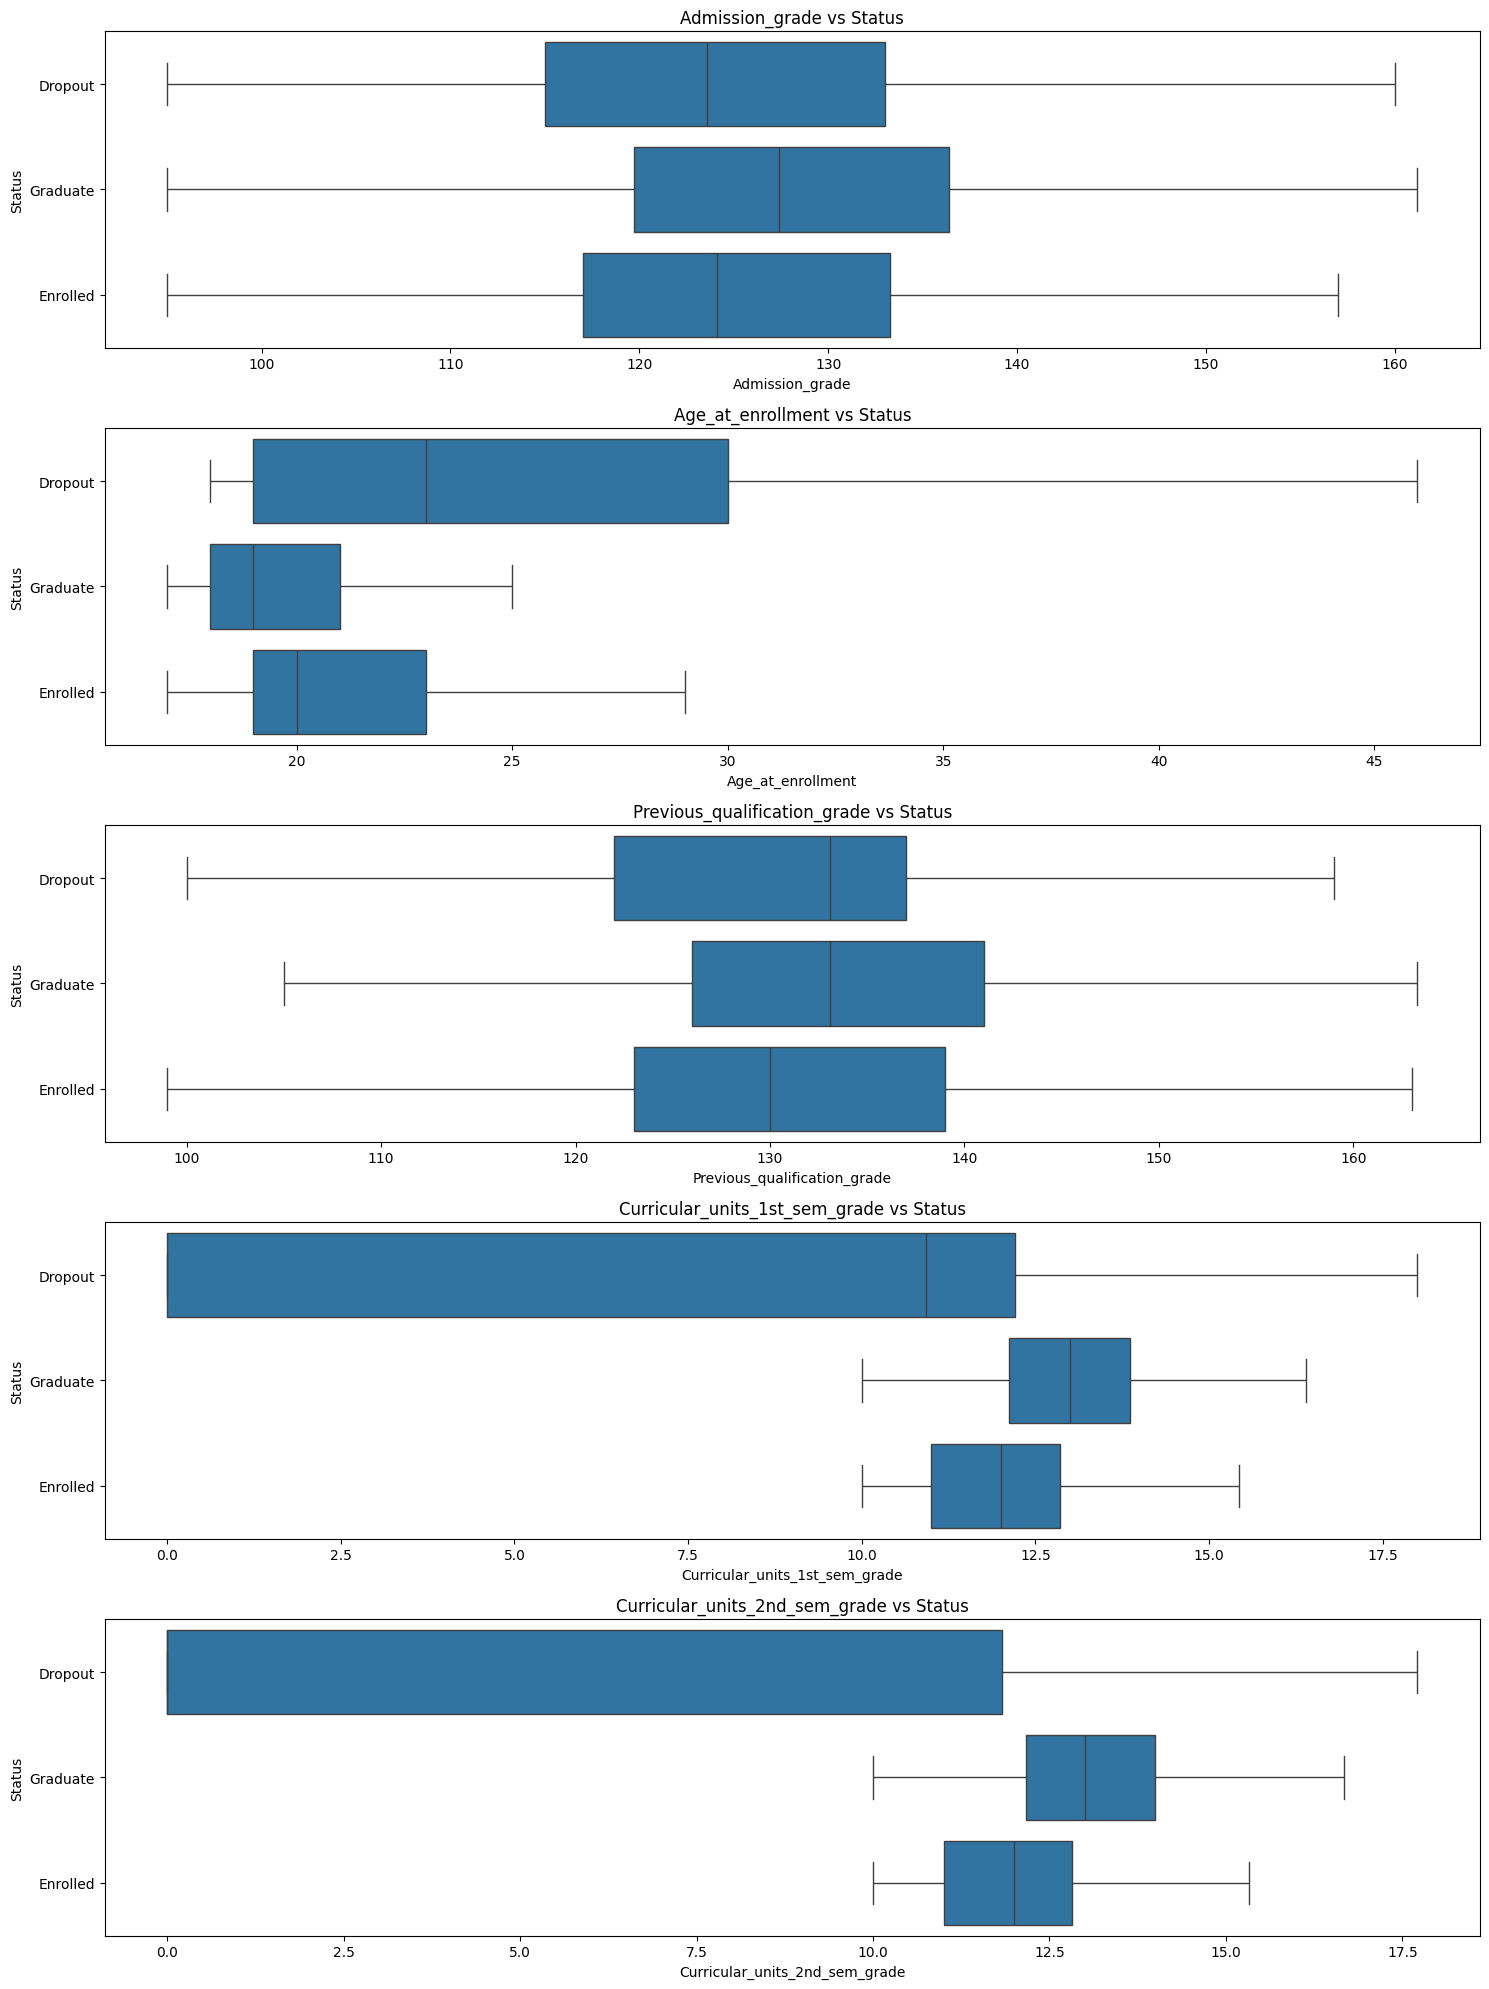

In [10]:
# Daftar fitur numerik
numeric_features = ['Admission_grade', 'Age_at_enrollment', 'Previous_qualification_grade', 'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade']

# Plot boxplot fitur numerik terhadap status
fig, ax = plt.subplots(len(numeric_features), 1, figsize=(15, 20))
for i, feature in enumerate(numeric_features):
    sns.boxplot(y='Status', x=feature, data=df_copy, ax=ax[i], showfliers=False)
    ax[i].set_title(f'{feature} vs Status')
plt.tight_layout()
plt.show()

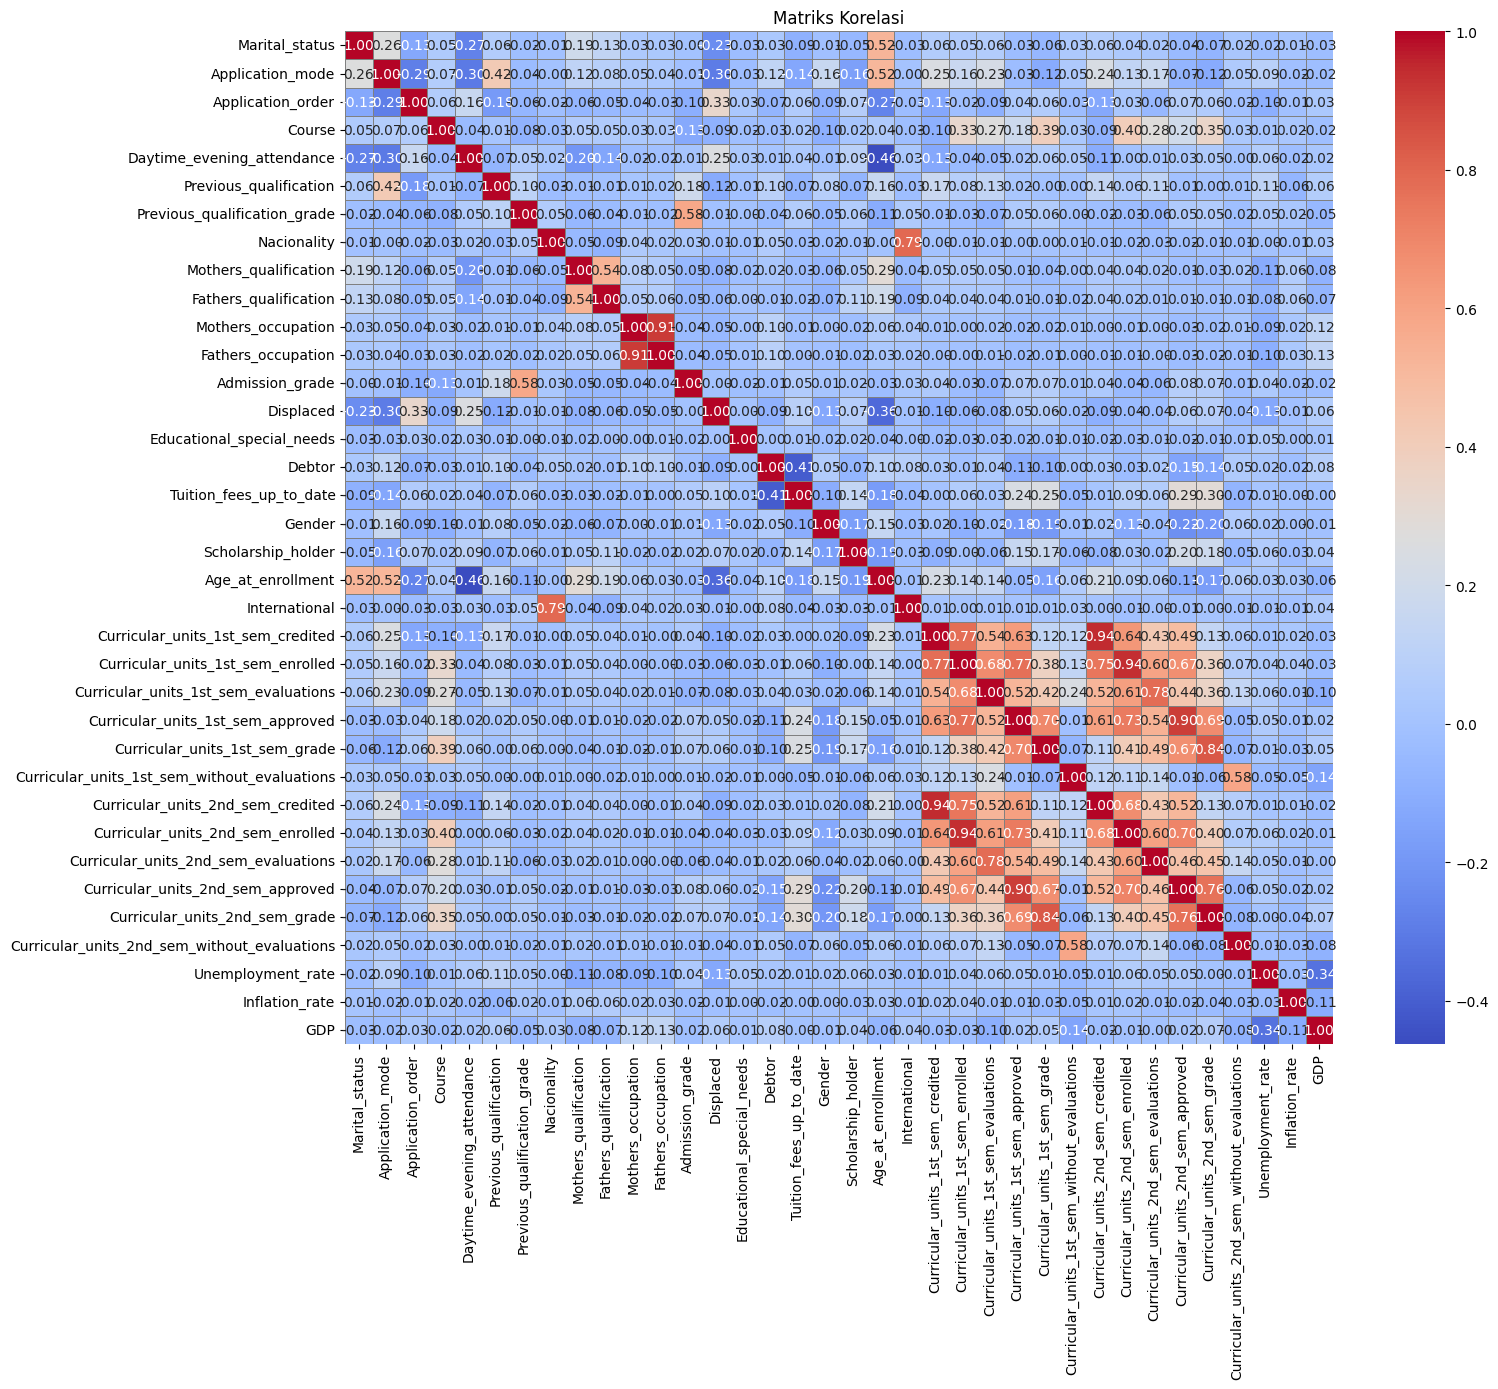

In [11]:
# Plot korelasi antar fitur numerik
plt.figure(figsize=(16, 14))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, linecolor='gray')
plt.title("Matriks Korelasi")
plt.tight_layout()
plt.show()

## Data Preparation / Preprocessing

Pada tahap *Data Preparation*, data dibagi menjadi dua bagian: data latih dan data uji, dengan proporsi 80:20, untuk memisahkan proses pelatihan dan evaluasi model. Distribusi label pada data latih kemudian divisualisasikan untuk mengidentifikasi ketidakseimbangan kelas. Ditemukan bahwa kelas "Enrolled" memiliki jumlah sampel yang jauh lebih sedikit dibandingkan kelas lainnya, sehingga dilakukan *undersampling* terhadap kelas mayoritas ("Dropout" dan sebagian "Graduate") agar distribusi antar kelas menjadi seimbang. Selanjutnya, data dipisahkan menjadi fitur (X) dan target (y), kemudian dilakukan *standardization* menggunakan `StandardScaler` agar setiap fitur memiliki skala yang seragam, penting untuk algoritma pembelajaran berbasis jarak. Target (label) dikodekan menjadi numerik menggunakan `LabelEncoder` agar dapat diproses oleh model. Setelah itu, dilakukan *Principal Component Analysis* (PCA) untuk mereduksi dimensi fitur sambil mempertahankan informasi sebanyak mungkin; jumlah komponen optimal ditentukan berdasarkan variansi kumulatif minimal 90%. Hasil PCA divisualisasikan untuk melihat seberapa banyak variansi yang dipertahankan dan dilakukan transformasi ulang berdasarkan jumlah komponen optimal tersebut untuk menghasilkan data akhir yang siap digunakan dalam tahap pemodelan.

In [12]:
# Split data menjadi train dan test
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)
print("Shape of train_df:", train_df.shape)
print("Shape of test_df:", test_df.shape)

Shape of train_df: (3539, 37)
Shape of test_df: (885, 37)


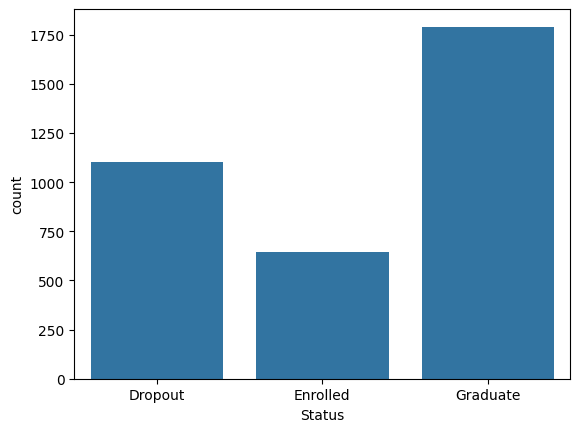

Status
Graduate    1791
Dropout     1105
Enrolled     643
Name: count, dtype: int64


In [13]:
# Tampilkan distribusi label pada data latih
sns.countplot(data=train_df, x="Status")
plt.show()
print(train_df['Status'].value_counts())

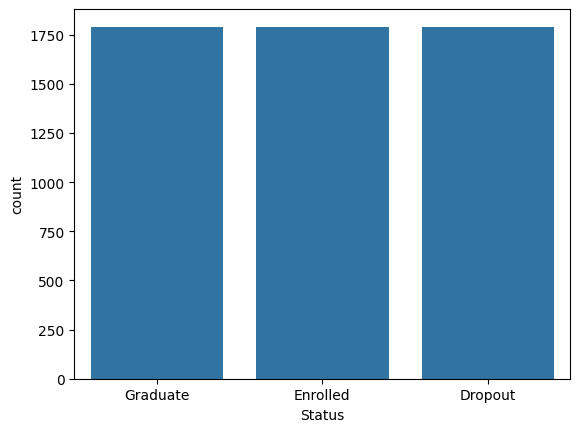

In [14]:
# Menyeimbangkan data dengan oversampling
from sklearn.utils import resample, shuffle
df_majority_1 = train_df[train_df.Status == "Graduate"]
df_majority_2 = train_df[train_df.Status == "Dropout"]
df_minority = train_df[train_df.Status == "Enrolled"]

df_majority_2_undersampled = resample(df_majority_2, n_samples=1791, random_state=42)
df_minority_undersampled = resample(df_minority, n_samples=1791, random_state=42)

oversampled_train_df = pd.concat([df_majority_1, df_majority_2_undersampled, df_minority_undersampled])
oversampled_train_df = shuffle(oversampled_train_df, random_state=42).reset_index(drop=True)

sns.countplot(data=oversampled_train_df, x="Status")
plt.show()

In [15]:
# Pisahkan fitur dan target
X_train = oversampled_train_df.drop(columns=["Status"])
y_train = oversampled_train_df["Status"]
X_test = test_df.drop(columns=["Status"])
y_test = test_df["Status"]

In [16]:
# Standarisasi dan PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1

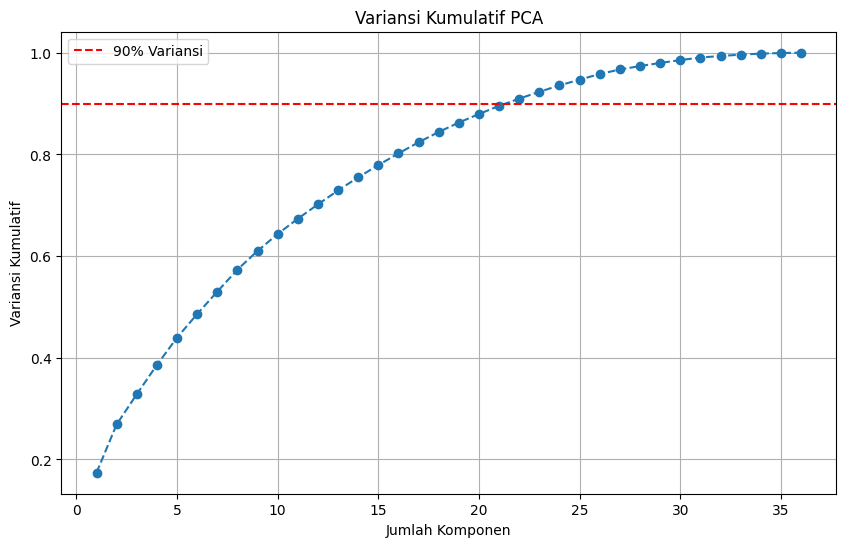

In [17]:
# Plot akumulasi variansi yang dijelaskan oleh PCA
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.90, color='red', linestyle='--', label='90% Variansi')
plt.title('Variansi Kumulatif PCA')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Variansi Kumulatif')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# Lakukan PCA ulang dengan jumlah komponen optimal
pca_opt = PCA(n_components=n_components_90)
X_train_pca_opt = pca_opt.fit_transform(X_train_scaled)
X_test_pca_opt = pca_opt.transform(X_test_scaled)

In [19]:
print(f"Jumlah fitur setelah PCA: {X_train_pca_opt.shape[1]}")

Jumlah fitur setelah PCA: 22


In [37]:
# Penskalaan setelah PCA
scaler_pca = StandardScaler()
X_train_pca_scaled = scaler_pca.fit_transform(X_train_pca_opt)
X_test_pca_scaled = scaler_pca.transform(X_test_pca_opt)
print(f"Jumlah fitur setelah PCA: {X_train_pca_scaled.shape[1]}")

Jumlah fitur setelah PCA: 22


In [38]:
# Simpan scaler untuk data asli
joblib.dump(scaler, 'scaler.joblib')
# Simpan objek PCA
joblib.dump(pca_opt, 'pca.joblib')
# Simpan scaler untuk data PCA
joblib.dump(scaler_pca, 'scaler_pca.joblib')

['scaler_pca.joblib']

## Modeling

Pada tahap *Modeling*, dilakukan pelatihan dan penyetelan (*hyperparameter tuning*) terhadap tiga model pembelajaran mesin: **Decision Tree**, **Random Forest**, dan **Gradient Boosting**. Setiap model dioptimalkan menggunakan teknik *Grid Search* dengan validasi silang (*cross-validation*) 5-fold untuk menemukan kombinasi parameter terbaik. Model Decision Tree diuji dengan berbagai kedalaman pohon dan metode pemilihan fitur serta kriteria pemisahan (*split*). Random Forest, sebagai pengembangan dari Decision Tree, juga diuji dengan variasi jumlah pohon, kedalaman, dan metode pemilihan fitur. Sementara itu, Gradient Boosting dievaluasi dengan mengombinasikan berbagai nilai *learning rate*, jumlah estimators, kedalaman pohon, dan pemilihan fitur. Semua model dilatih menggunakan data fitur hasil reduksi dimensi dari PCA, dan model terbaik dari masing-masing algoritma disimpan menggunakan `joblib` untuk digunakan kembali pada tahap evaluasi atau penerapan lebih lanjut.

In [21]:
# Model dan tuning hyperparameter
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import joblib

train_pca_df = pd.DataFrame(X_train_pca_opt)
test_pca_df = pd.DataFrame(X_test_pca_opt)

In [22]:
# Decision Tree
param_grid_tree = {"max_features": ["sqrt", "log2"], "max_depth": [5, 6, 7, 8], "criterion": ["gini", "entropy"]}
CV_tree = GridSearchCV(DecisionTreeClassifier(random_state=123), param_grid_tree, cv=5, n_jobs=-1)
CV_tree.fit(train_pca_df, y_train_encoded)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2']})

In [24]:
best_tree = CV_tree.best_estimator_
joblib.dump(best_tree, "model/tree_model.joblib")

['model/tree_model.joblib']

In [25]:
# Random Forest
param_grid_rdf = {"n_estimators": [200, 500], "max_features": ["sqrt", "log2"], "max_depth": [6, 7, 8], "criterion": ["gini", "entropy"]}
CV_rdf = GridSearchCV(RandomForestClassifier(random_state=123), param_grid_rdf, cv=5, n_jobs=-1)
CV_rdf.fit(train_pca_df, y_train_encoded)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [26]:
best_rdf = CV_rdf.best_estimator_
joblib.dump(best_rdf, "model/rdf_model.joblib")

['model/rdf_model.joblib']

In [27]:
# Gradient Boosting
param_grid_gboost = {"max_depth": [5, 8], "n_estimators": [200, 300], "learning_rate": [0.01, 0.1], "max_features": ["sqrt", "log2"]}
CV_gboost = GridSearchCV(GradientBoostingClassifier(random_state=123), param_grid_gboost, cv=5, n_jobs=-1)
CV_gboost.fit(train_pca_df, y_train_encoded)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [5, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300]})

In [28]:
best_gboost = CV_gboost.best_estimator_
joblib.dump(best_gboost, "model/gboost_model.joblib")

['model/gboost_model.joblib']

## Evaluation

Pada tahap **Evaluasi Model**, kinerja dari ketiga model yang telah dilatih—Decision Tree, Random Forest, dan Gradient Boosting—dievaluasi menggunakan *classification report* dan *confusion matrix* terhadap data uji. Hasil prediksi setiap model dibandingkan dengan label sebenarnya untuk menilai metrik seperti presisi, recall, dan f1-score untuk masing-masing kelas. Visualisasi *confusion matrix* membantu melihat distribusi kesalahan klasifikasi antar kelas. Selain itu, dilakukan analisis terhadap pengaruh fitur asli terhadap komponen PCA dengan menghitung total bobot absolut setiap fitur dalam pembentukan komponen utama. Fitur-fitur dengan kontribusi tertinggi divisualisasikan untuk memberikan pemahaman mengenai variabel mana yang paling berdampak dalam representasi data setelah transformasi PCA. Ini berguna untuk interpretabilitas dan pemahaman karakteristik data yang berkontribusi besar terhadap performa model.

In [29]:
# Evaluasi model
from sklearn.metrics import classification_report, confusion_matrix

def evaluating(y_pred, y_true):
    labels = encoder.classes_
    print(classification_report(y_true=y_true, y_pred=y_pred, target_names=labels))
    cm = confusion_matrix(y_true=y_true, y_pred=y_pred, labels=labels)
    sns.heatmap(pd.DataFrame(cm, index=labels, columns=labels), annot=True, fmt='d', cmap='YlGnBu')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

              precision    recall  f1-score   support

     Dropout       0.70      0.60      0.65       316
    Enrolled       0.29      0.42      0.34       151
    Graduate       0.73      0.69      0.71       418

    accuracy                           0.61       885
   macro avg       0.57      0.57      0.56       885
weighted avg       0.64      0.61      0.62       885



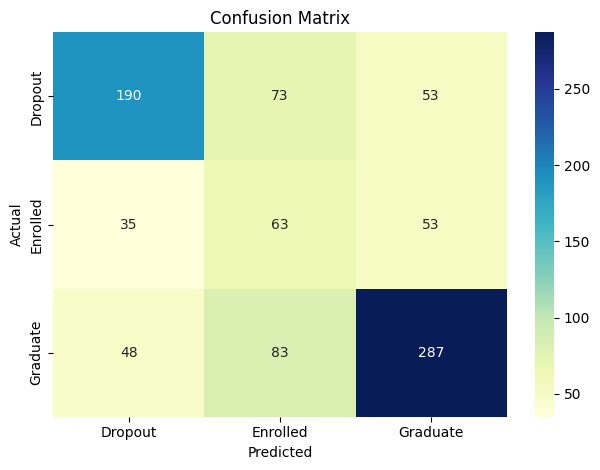

              precision    recall  f1-score   support

     Dropout       0.87      0.66      0.75       316
    Enrolled       0.37      0.46      0.41       151
    Graduate       0.76      0.84      0.80       418

    accuracy                           0.71       885
   macro avg       0.67      0.65      0.65       885
weighted avg       0.73      0.71      0.71       885



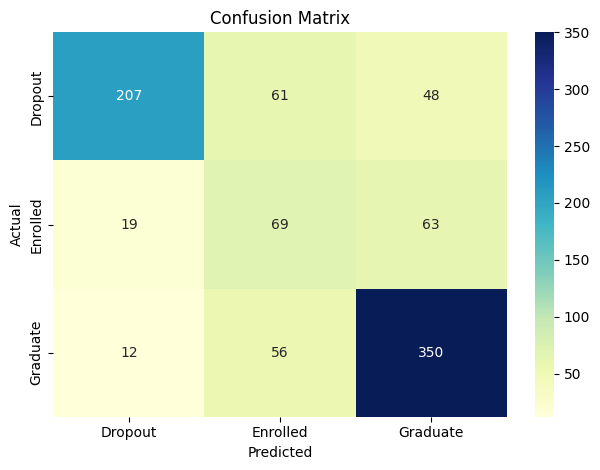

              precision    recall  f1-score   support

     Dropout       0.88      0.68      0.77       316
    Enrolled       0.47      0.32      0.38       151
    Graduate       0.73      0.93      0.82       418

    accuracy                           0.74       885
   macro avg       0.69      0.64      0.65       885
weighted avg       0.74      0.74      0.72       885



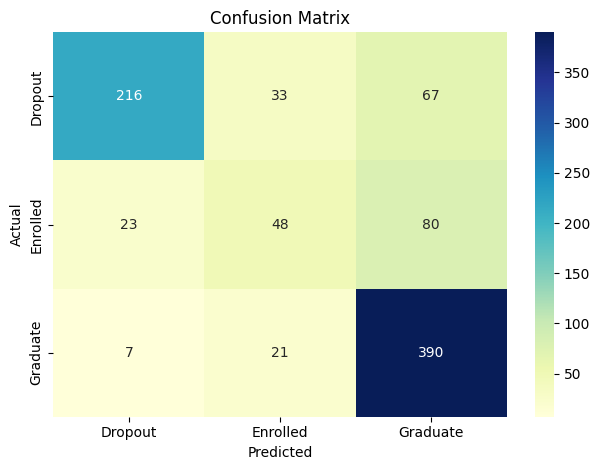

In [30]:
# Evaluasi semua model
y_test_labels = encoder.inverse_transform(y_test_encoded)
y_pred_tree = encoder.inverse_transform(best_tree.predict(test_pca_df))
evaluating(y_pred_tree, y_test_labels)
y_pred_rdf = encoder.inverse_transform(best_rdf.predict(test_pca_df))
evaluating(y_pred_rdf, y_test_labels)
y_pred_gboost = encoder.inverse_transform(best_gboost.predict(test_pca_df))
evaluating(y_pred_gboost, y_test_labels)

In [31]:
# Cek fitur asli yang paling memengaruhi PCA
loadings = pca_opt.components_
feature_influence = np.sum(np.abs(loadings), axis=0)
original_feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'influence_on_pca': feature_influence
}).sort_values(by='influence_on_pca', ascending=False)

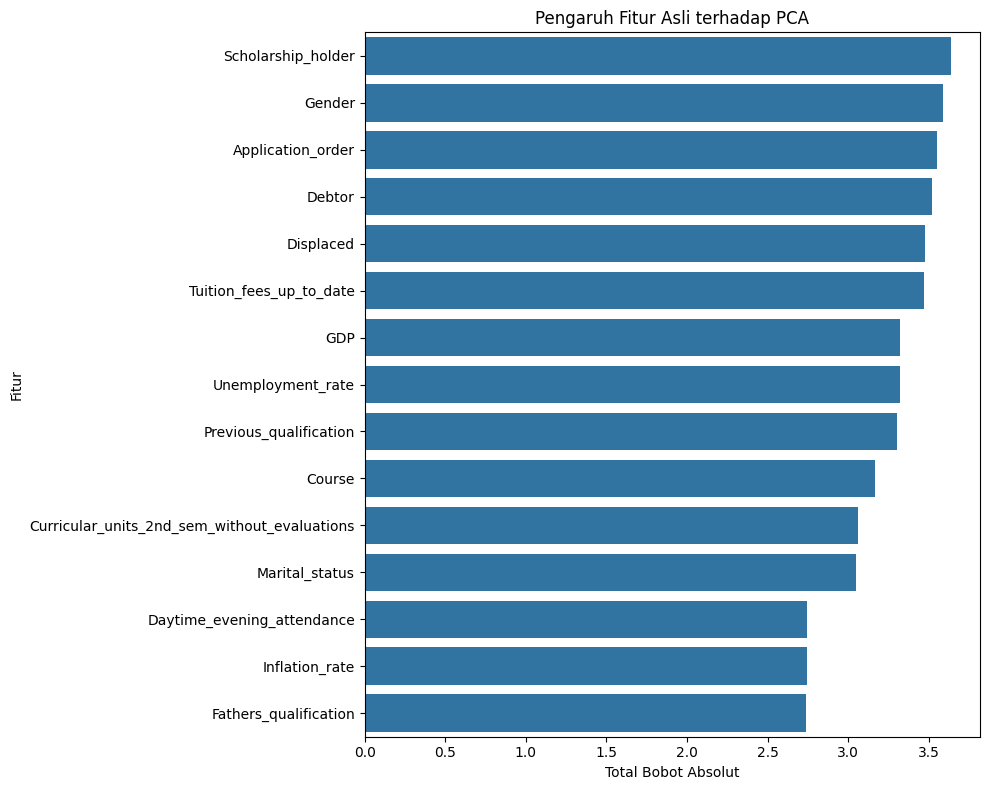

In [32]:
# Visualisasi fitur paling berpengaruh
plt.figure(figsize=(10, 8))
sns.barplot(x='influence_on_pca', y='feature', data=original_feature_importance_df.head(15))
plt.title('Pengaruh Fitur Asli terhadap PCA')
plt.xlabel('Total Bobot Absolut')
plt.ylabel('Fitur')
plt.tight_layout()
plt.show()

## Catatan Analisis Feature Importance pada PCA

Gradient Boosting pada dasarnya memiliki kemampuan untuk memberikan *feature importance* secara langsung melalui atribut `feature_importances_` setelah proses pelatihan. Nilai tersebut menunjukkan seberapa besar kontribusi setiap fitur dalam membuat keputusan pada model.

Namun, dalam proyek ini, kita melakukan pelatihan model menggunakan data yang telah direduksi dimensinya menggunakan PCA (Principal Component Analysis), yaitu `X_train_pca_opt`. Artinya, fitur yang digunakan oleh model bukan lagi fitur asli, melainkan komponen-komponen utama hasil transformasi PCA.

Oleh karena itu:

- Atribut `best_gboost.feature_importances_` hanya akan menunjukkan pentingnya *komponen PCA*, bukan *fitur asli*.
- Kita tidak bisa langsung memetakan pentingnya masing-masing fitur asli dari nilai tersebut.